In [ ]:
# Create Classes that model tables
# Perform CRUD Operations
# Reflect Existing DB's
# Use the SQLAlchemy Inspector
# Plot query results from ORM

In [3]:
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, Float
import os

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [104]:
# Establish Connection to the Database
file_path = os.path.abspath(os.getcwd())+"\sharksright.db"
engine = create_engine(f"sqlite:///{file_path}")
Base.metadata.create_all(engine)
conn = engine.connect()

In [105]:
# Define the Table in the Database

class sharks(Base):
    __tablename__ = 'sharks'
    id = Column(Integer,primary_key = True)
    case_number = Column(Integer)
    date = Column(String)
    year = Column(Integer)
    type = Column(String)
    country = Column(String)
    area = Column(String)
    location = Column(String)
    activity = Column(String)
    name = Column(String)
    sex = Column(String)
    age = Column(Integer)
    injury = Column(String)
    fatal_y_n = Column(String)
    time = Column(String)
    species = Column(String)
    investigator_or_source = Column(String) 
    pdf = Column(String)
    

In [106]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

#Print all shark attack locations
sharks = session.query(sharks)
for shark in sharks:
    print(shark.location)

Point Casuarina, Bunbury
Bateman's Bay
Ponce Inlet, Volusia County
Pulau Payar Island
Alenuihaha Channel
The Natural Jetty, Rottnest Island
Near Albany
Bourail
Off Cape Point
Taranaki
Avalon
Honokowai, Maui


In [117]:
# Print the number of provoked attacks
provoked_attacks = session.query(Sharks).filter_by(type = 'Provoked').count()
print(str(provoked_attacks))

12


In [131]:
# Print the number of attacks in the USA
attacks = session.query(Sharks).filter_by(country = 'USA').count()
print(str(attacks))

28


In [139]:
# Print the number of attacks in 2017 

attacks = session.query(Sharks).filter_by(year = '2017').count()
print(str(attacks))

3


In [141]:
# Print the number of attacks while surfing

attacks = session.query(Sharks).filter_by(activity = 'Surfing').count()
attacks


34

In [155]:
# Print the number of fatal shark attacks in 2017 in Australia

attacks = session.query(Sharks).filter(Sharks.country=='AUSTRALIA')\
    .filter(Sharks.year =='2017').count()
attacks


3

In [4]:
# Updating and Deleting Rows

# Creating a new Table called Garbage
Base = declarative_base()
class Garbage(Base):
    __tablename__ = 'garbage_collection'
    id = Column(Integer,primary_key = True)
    item = Column(String(255))
    weight = Column(Float)
    collector = Column(String(255))

# Creating new rows and their data
item1 = Garbage(item='Trash Bag',weight=12.3,collector='Bob')
item2 = Garbage(item='Plastic Toy',weight=14.5,collector='Jen')
item3 = Garbage(item='Food',weight=2.3,collector='John')
item4 = Garbage(item='Paper Towel',weight=3.4,collector='Andrew')
item5 = Garbage(item='Wood',weight=5.6,collector='Sam')


In [6]:
# Creating a database on my local machine & Connecting to it
file_path = os.path.abspath(os.getcwd())+"\Garbage.db"
engine = create_engine(f"sqlite:///{file_path}")
conn = engine.connect()

# Uploading the table to the Garbage Database
from sqlalchemy.orm import Session
Base.metadata.create_all(engine)
session = Session(bind=engine)

In [7]:
# Adding & Saving the new rows to the database on my machine
session.add(item1)
session.add(item2)
session.add(item3)
session.add(item4)
session.add(item5)
session.commit()

In [10]:
# Changing the Different Values for two rows

# Changing the trashbag weight from 12.3 to 14.3
trash = session.query(Garbage).filter_by(item='Trash Bag').first()
trash.weight = 14.3

# Changing the Food Collector for Food from John to Susan
trash = session.query(Garbage).filter_by(item='Food').first()
trash.collector = 'Susan'


'Susan'

In [16]:
# Deleting a row
from sqlalchemy import func

delete = session.query(Garbage).filter_by(item='Food').delete()
session.commit()                        

In [18]:
# Printing all Data in the Table
items = session.query(Garbage)
for item in items:
    print('-'*12)
    print(f'ID: {item.id}')
    print(f'Item: {item.item}')
    print(f'Weight: {item.weight}')
    print(f'Collector: {item.collector}')
    

------------
ID: 1
Item: Trash Bag
Weight: 14.3
Collector: Bob
------------
ID: 2
Item: Plastic Toy
Weight: 14.5
Collector: Jen
------------
ID: 4
Item: Paper Towel
Weight: 3.4
Collector: Andrew
------------
ID: 5
Item: Wood
Weight: 5.6
Collector: Sam
------------
ID: 6
Item: Trash Bag
Weight: 12.3
Collector: Bob
------------
ID: 7
Item: Plastic Toy
Weight: 14.5
Collector: Jen
------------
ID: 9
Item: Paper Towel
Weight: 3.4
Collector: Andrew
------------
ID: 10
Item: Wood
Weight: 5.6
Collector: Sam


## Reflecting an Existing Database

In [53]:
from sqlalchemy.ext.automap import automap_base
import os

file_path = os.path.abspath(os.getcwd())+"/demographics.db"
engine = create_engine(f"sqlite:///{file_path}")

In [54]:
# Creating a Base
Base = automap_base()
Base.prepare(engine,reflect=True)

In [55]:
# Showcase the Tables within the Database File
Base.classes.keys()

['demographics']

In [56]:
# Creates an Instance of the Demographic Table
Demographic_table = Base.classes.demographics
# Create a session
session = Session(engine)

In [57]:
# Print out the columns and first row data

first_row = session.query(Demographic_table).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fe6dddc0b8>,
 'id': 0,
 'location': 'South Dakota',
 'salary': 68,
 'occupation': 'Choreographer',
 'weight_kg': 53.0,
 'age': 58,
 'academic_degree': 'PhD',
 'children': 1,
 'height_meter': 1.87}

In [58]:
# Print out the first 5 Locations
five = session.query(Demographic_table).limit(5)
for location in five:
    print(location.location)

South Dakota
Delaware
South Dakota
Louisiana
West Virginia


In [59]:
# Print out all the Unique Locations
for val in session.query(Demographic_table.location).distinct():
    print(val.location)

South Dakota
Delaware
Louisiana
West Virginia
Alaska


## SQL Alchemy Inspector Tool
### A lot easier way to view table information

In [62]:
from sqlalchemy import inspect

file_path = os.path.abspath(os.getcwd())+"/testing.db"
engine = create_engine(f"sqlite:///{file_path}")

In [63]:
# Get Table Names
inspector = inspect(engine)
inspector.get_table_names()

['Salaries']

In [65]:
# Get the Columns and Data Types for The Salaries Table
columns = inspector.get_columns('Salaries')
for val in columns:
    print(val['name'], val['type'])

Id INTEGER
EmployeeName TEXT
JobTitle TEXT
BasePay NUMERIC
OvertimePay NUMERIC
OtherPay NUMERIC
Benefits NUMERIC
TotalPay NUMERIC
TotalPayBenefits NUMERIC
Year INTEGER
Notes TEXT
Agency TEXT
Status TEXT


In [71]:
# Reflect the Salary Table to view & Manipulate the Data
Base = automap_base()
Base.prepare(engine,reflect=True)

Base.classes.keys()


['Salaries']

In [73]:
# Create the Table and Session
table = Base.classes.Salaries
session = Session(engine)

In [80]:
# Count the Number of Salaries that are above 50,000
val = session.query(table).filter(table.BasePay > 50000).count()
val

99212

## Emoji Plotting

In [104]:
# Connecting to the Database
file_path = os.path.abspath(os.getcwd())+"/emoji.db"
engine = create_engine(f"sqlite:///{file_path}")

In [105]:
# Finding the name of the table and printing out the columns for the table
inspector = inspect(engine)
print(f'The tables within the Database are: {inspector.get_table_names()}')
table = inspector.get_columns('emoji')

for val in table:
    print(val['name'],val['type'])

The tables within the Database are: ['emoji']
id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [109]:
# Reflect the Database in order to access the Data
Base = automap_base()
Base.prepare(engine,reflect=True)
print(Base.classes.keys())

session = Session(engine)
table = Base.classes.emoji

['emoji']


In [159]:
from sqlalchemy import desc
v = session.query(table).order_by(desc(table.score)).limit(10)

for row in v:
    print(row.emoji_char,row.score)
    
scores = [row.score for row in v]
emoji = [row.emoji_char for row in v]

😂 1814832150
❤️ 840619939
😍 680382416
♥️ 652715459
😭 515991922
😊 484540701
♻️ 452489849
😒 441690175
💕 381679908
😘 377847645


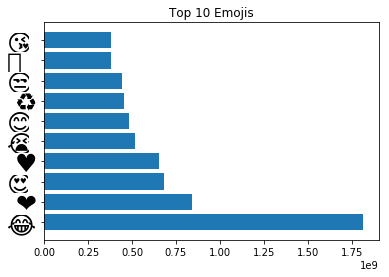

<Figure size 360x288 with 0 Axes>

In [160]:
import matplotlib.pyplot as plt

plt.barh(emoji, scores)
plt.tick_params(axis='y',which='major',labelsize=25)
plt.title('Top 10 Emojis')
plt.figure(figsize=(5,4))
plt.show()